# **2. Análisis Exploratorio de Datos (EDA)**

##  Librerías



In [21]:
# === Importaciones base del EDA ===
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu

pd.set_option("display.max_columns", 100)
sns.set(style="whitegrid")
FIGS = Path("..")/"docs"/"assets"/"figuras"
FIGS.mkdir(parents=True, exist_ok=True)


## **1. Carga de la Base de Datos**

In [20]:
from pathlib import Path
import pandas as pd
import kagglehub

# Rutas del proyecto
DATA_DIR = Path("..")/"data"
RAW = DATA_DIR/"raw"
PROC = DATA_DIR/"processed"
RAW.mkdir(parents=True, exist_ok=True)
PROC.mkdir(parents=True, exist_ok=True)

# 1) Descargar dataset (devuelve la carpeta local del dataset)
local_dir = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Descargado en:", local_dir)

# 2) Nombre del CSV dentro del dataset
csv_path = Path(local_dir) / "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# 3) Leer CSV
df = pd.read_csv(csv_path)

# 4) Limpieza mínima de columnas y tipos
df.columns = (
    df.columns
      .str.strip()
      .str.replace(" ", "_")
      .str.replace("(", "", regex=False)
      .str.replace(")", "", regex=False)
)
# TotalCharges a numérico (viene con espacios en algunas filas)
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

print("Shape:", df.shape)
display(df.head())

# 5) Guardar copias
df.to_csv(RAW/"telco_churn.csv", index=False)
df.to_parquet(PROC/"telco_churn.parquet", index=False)
print("Guardado en:")
print(" -", (RAW/"telco_churn.csv").resolve())
print(" -", (PROC/"telco_churn.parquet").resolve())


100%|██████████| 172k/172k [00:00<00:00, 1.12MB/s]

Extracting files...


Descargado en: C:\Users\juana\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1
Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Guardado en:
 - C:\Users\juana\MLOPS\miniproyecto6\data\raw\telco_churn.csv
 - C:\Users\juana\MLOPS\miniproyecto6\data\processed\telco_churn.parquet


In [22]:
# Si guardaste parquet/csv en la celda anterior:
RAW = Path("..")/"data"/"raw"/"telco_churn.csv"
PROC = Path("..")/"data"/"processed"/"telco_churn.parquet"

# Lee preferiblemente parquet (más rápido y tipos estables)
df = pd.read_parquet(PROC) if PROC.exists() else pd.read_csv(RAW)

print(df.shape)
df.head()



(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
# Renombra columnas (por si cambiaste el paso anterior)
df.columns = (
    df.columns
      .str.strip()
      .str.replace(" ", "_")
      .str.replace("(", "", regex=False)
      .str.replace(")", "", regex=False)
)

# Tipos a revisar
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
ID_COL = "customerID" if "customerID" in df.columns else "customerid"

# Duplicados exactos
dup_rows = df.duplicated().sum()
dup_ids = df[ID_COL].duplicated().sum() if ID_COL in df.columns else 0

print(f"Duplicados exactos (filas): {dup_rows}")
print(f"Duplicados en ID ({ID_COL}): {dup_ids}")

# (Opcional) Eliminar duplicados de filas
# df = df.drop_duplicates().reset_index(drop=True)



Duplicados exactos (filas): 0
Duplicados en ID (customerID): 0


In [25]:
# Convertir TotalCharges a numérico (tiene espacios vacíos)
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Target a binario 0/1
TARGET = "Churn"
assert TARGET in df.columns, "No se encontró la columna 'Churn'."

df[TARGET] = df[TARGET].map({"Yes":1, "No":0}).astype("int8")

# Columnas categóricas y numéricas
cat_cols = (df.select_dtypes(include=["object"]).columns
            .drop(ID_COL) if ID_COL in df.columns else df.select_dtypes(include=["object"]).columns)
num_cols = df.select_dtypes(include=[np.number]).columns.drop(TARGET)

cat_cols = [c for c in cat_cols if c != TARGET]
num_cols = [c for c in num_cols if c != TARGET]

print("Numéricas:", len(num_cols), num_cols[:10])
print("Categóricas:", len(cat_cols), cat_cols[:10])


Numéricas: 4 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categóricas: 15 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']


In [26]:
# Conteo y % de faltantes por columna
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (df.isna().mean()*100).round(2).sort_values(ascending=False)
faltantes = pd.DataFrame({"faltantes": na_counts, "%": na_pct})
faltantes[faltantes["faltantes"]>0]



,faltantes,%
TotalCharges,11,0.16


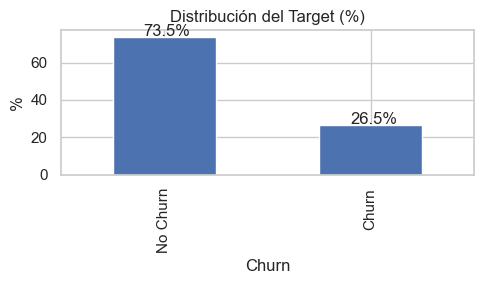

Churn
0    5174
1    1869
Name: count, dtype: int64

In [28]:
ax = (df[TARGET].value_counts(normalize=True)
      .rename({0:"No Churn",1:"Churn"})
      .mul(100).plot(kind="bar", figsize=(5,3)))
plt.title("Distribución del Target (%)")
plt.ylabel("%")
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x()+0.15, p.get_height()+0.5))
plt.tight_layout()
plt.savefig(FIGS/"eda_target_balance.png", dpi=140)
plt.show()

df[TARGET].value_counts()


In [29]:
# Numéricas
desc_num = df[num_cols].describe().T
display(desc_num)

# Categóricas: cardinalidad y top frecuencias
def freq_table(s, k=5):
    vc = s.value_counts(dropna=False)
    return pd.DataFrame({
        "cardinalidad": [vc.size],
        "top_k": [dict(vc.head(k))]
    })

tabla_cat = pd.concat([freq_table(df[c]) for c in cat_cols], axis=0)
tabla_cat.index = cat_cols
display(tabla_cat)



,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


,cardinalidad,top_k
gender,2,"{'Male': 3555, 'Female': 3488}"
Partner,2,"{'No': 3641, 'Yes': 3402}"
Dependents,2,"{'No': 4933, 'Yes': 2110}"
PhoneService,2,"{'Yes': 6361, 'No': 682}"
MultipleLines,3,"{'No': 3390, 'Yes': 2971, 'No phone service': ..."
InternetService,3,"{'Fiber optic': 3096, 'DSL': 2421, 'No': 1526}"
OnlineSecurity,3,"{'No': 3498, 'Yes': 2019, 'No internet service..."
OnlineBackup,3,"{'No': 3088, 'Yes': 2429, 'No internet service..."
DeviceProtection,3,"{'No': 3095, 'Yes': 2422, 'No internet service..."
TechSupport,3,"{'No': 3473, 'Yes': 2044, 'No internet service..."


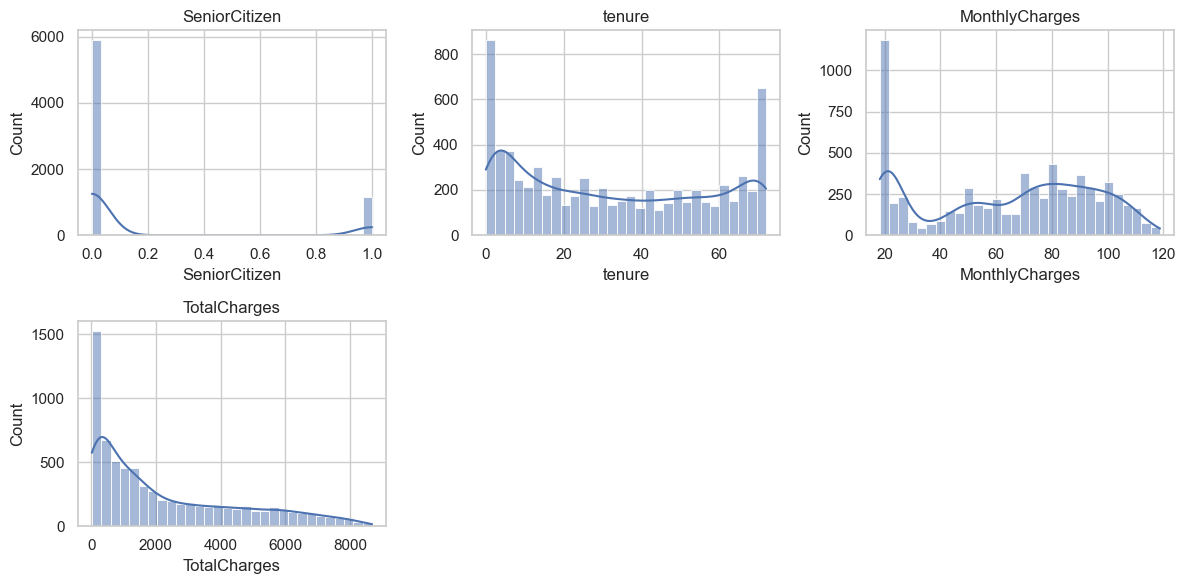

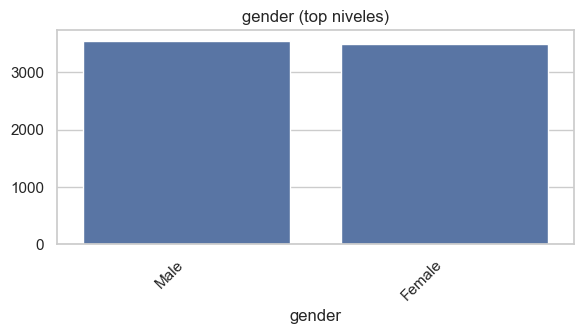

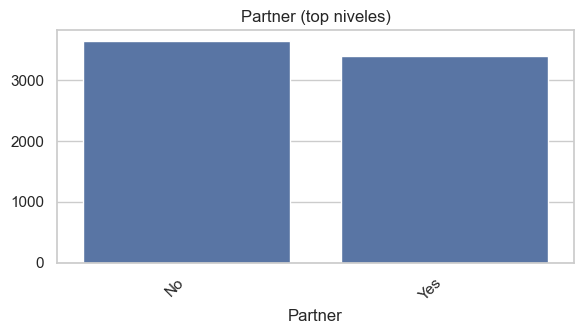

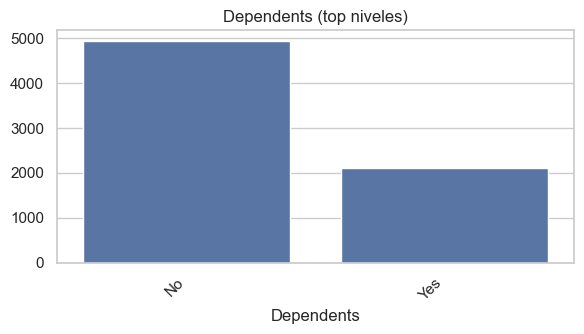

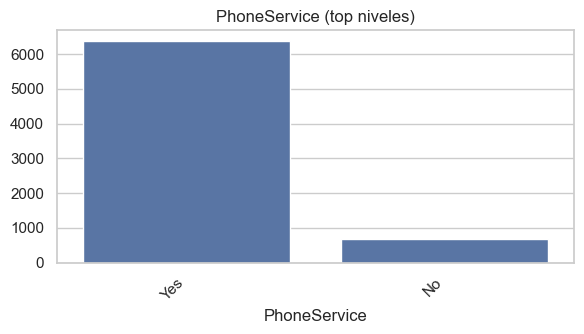

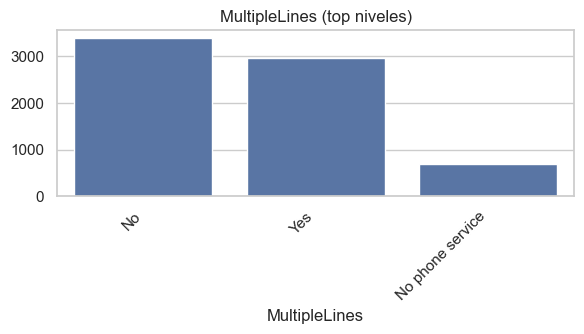

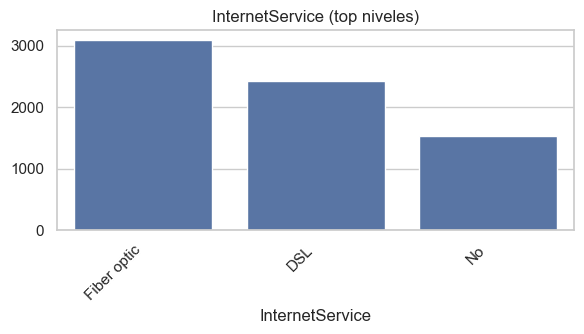

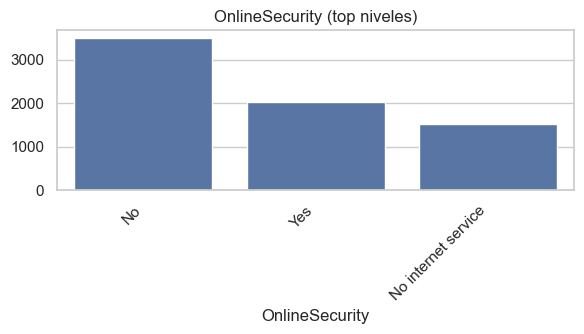

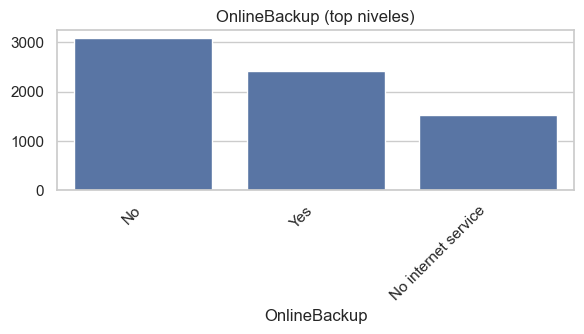

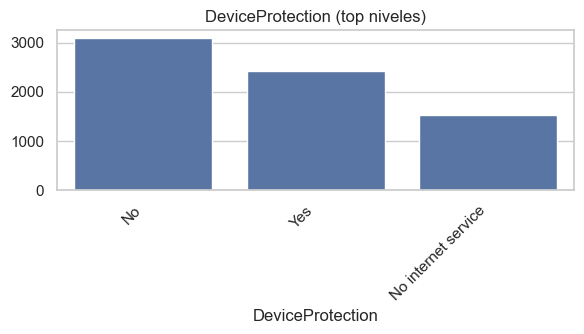

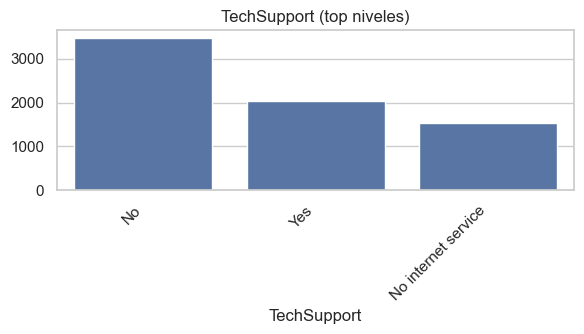

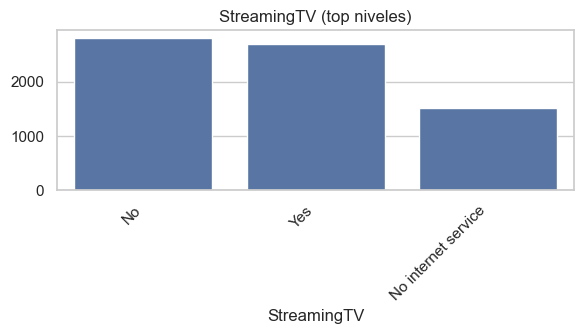

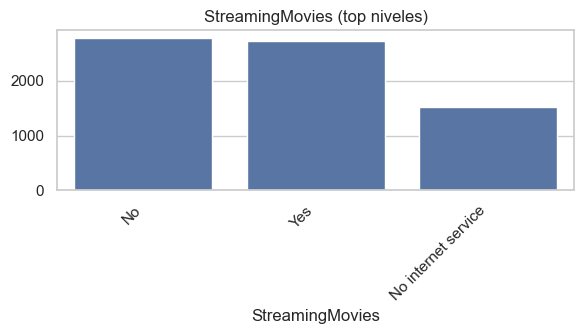

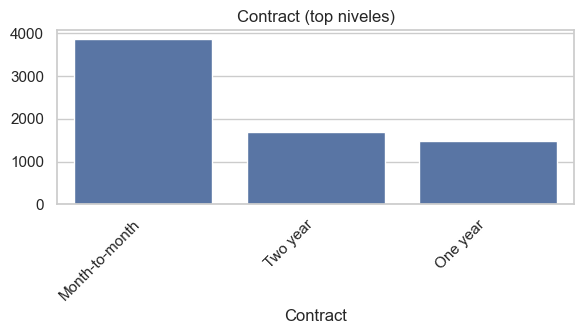

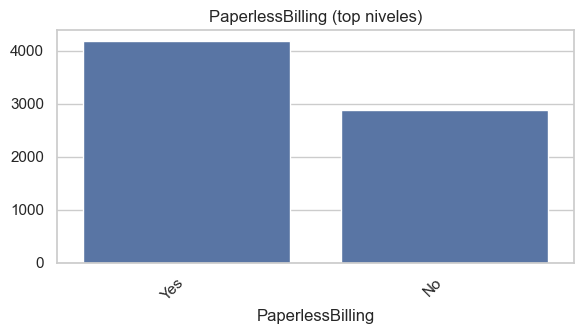

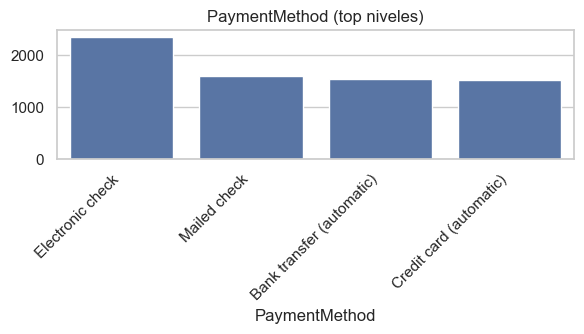

In [30]:
# Histogramas/KDE para numéricas
n = len(num_cols)
cols = 3
rows = int(np.ceil(n/cols))
plt.figure(figsize=(cols*4, rows*3))
for i,c in enumerate(num_cols,1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[c], kde=True, bins=30)
    plt.title(c)
plt.tight_layout()
plt.savefig(FIGS/"eda_hist_num.png", dpi=140)
plt.show()

# Barras para categóricas (solo top 10 niveles si hay muchos)
for c in cat_cols:
    plt.figure(figsize=(6,3.5))
    vc = df[c].value_counts(dropna=False)
    vc = vc if vc.size<=10 else vc.head(10)
    sns.barplot(x=vc.index.astype(str), y=vc.values)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"{c} (top niveles)")
    plt.tight_layout()
    plt.savefig(FIGS/f"eda_bar_{c}.png", dpi=140)
    plt.show()



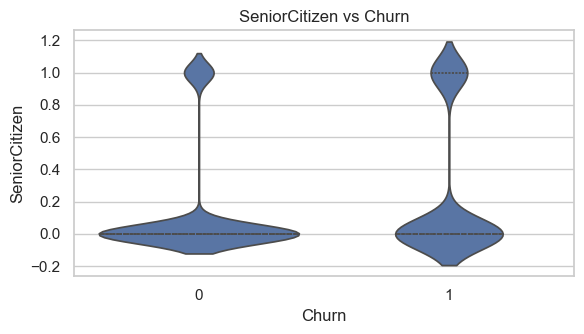

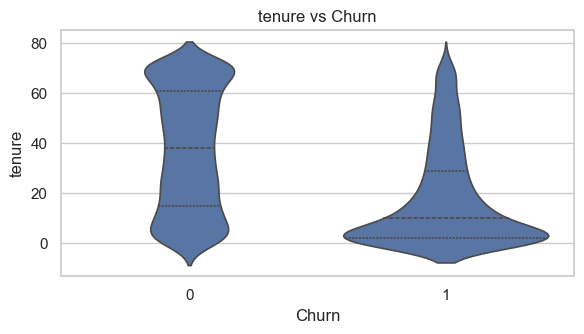

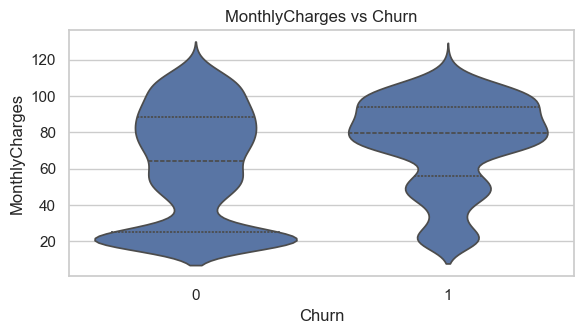

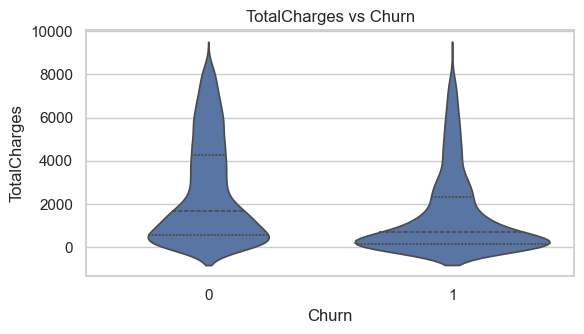

,variable,U_stat,p_value
1,tenure,7154668.0,2.419636e-208
3,TotalCharges,6288982.0,1.995985e-84
2,MonthlyCharges,3667080.5,3.311628e-54
0,SeniorCitizen,4226068.0,9.588357e-37


In [31]:
# Boxplot/violin por target
for c in num_cols:
    plt.figure(figsize=(6,3.5))
    sns.violinplot(x=TARGET, y=c, data=df, inner="quartile")
    plt.title(f"{c} vs {TARGET}")
    plt.tight_layout()
    plt.savefig(FIGS/f"eda_violin_{c}.png", dpi=140)
    plt.show()

# Prueba estadística: Mann-Whitney (no asume normalidad)
tests_num = []
for c in num_cols:
    g0 = df.loc[df[TARGET]==0, c].dropna()
    g1 = df.loc[df[TARGET]==1, c].dropna()
    stat, p = mannwhitneyu(g0, g1, alternative="two-sided")
    tests_num.append({"variable": c, "U_stat": stat, "p_value": p})
tests_num = pd.DataFrame(tests_num).sort_values("p_value")
display(tests_num.head(10))



,variable,chi2,p_value,dof
12,Contract,1184.596572,5.863038e-258,2
6,OnlineSecurity,849.998968,2.661150e-185,2
9,TechSupport,828.197068,1.443084e-180,2
5,InternetService,732.309590,9.571788e-160,2
14,PaymentMethod,648.142327,3.682355e-140,3
7,OnlineBackup,601.812790,2.079759e-131,2
8,DeviceProtection,558.419369,5.505219e-122,2
11,StreamingMovies,375.661479,2.667757e-82,2
10,StreamingTV,374.203943,5.528994e-82,2
13,PaperlessBilling,258.277649,4.073355e-58,1


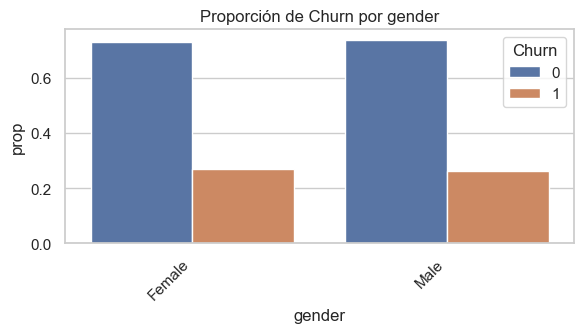

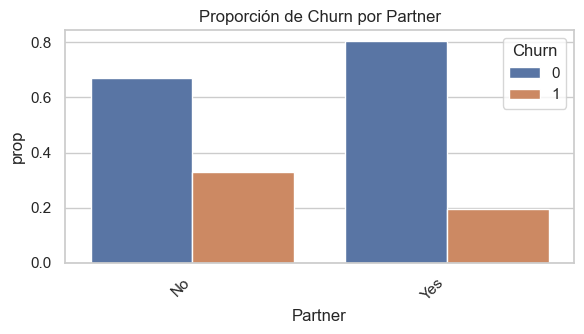

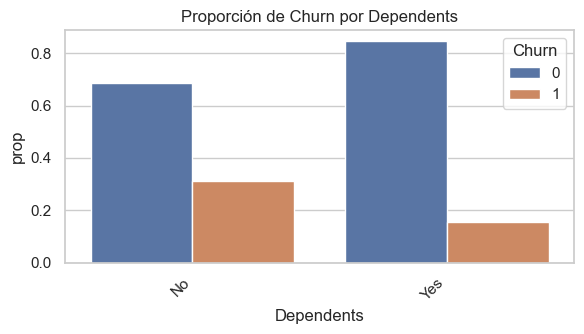

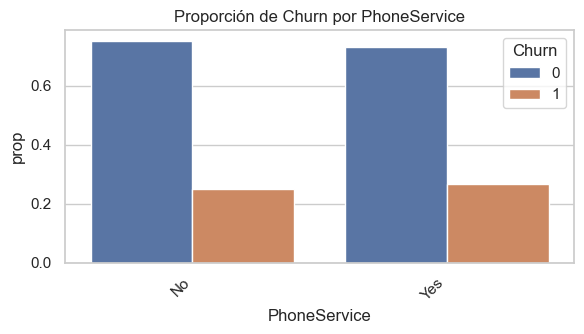

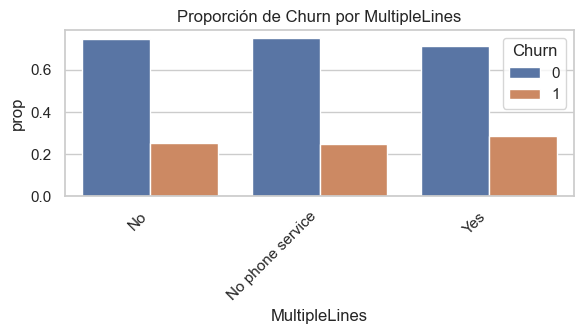

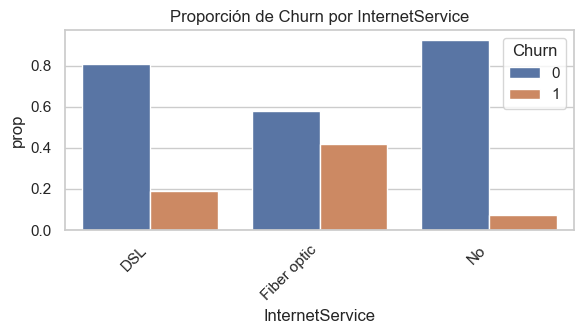

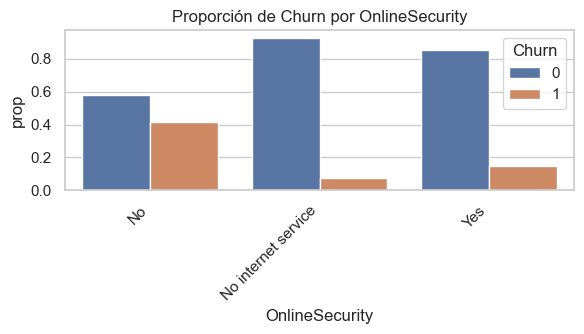

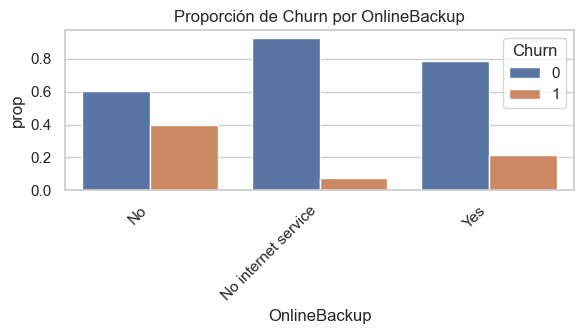

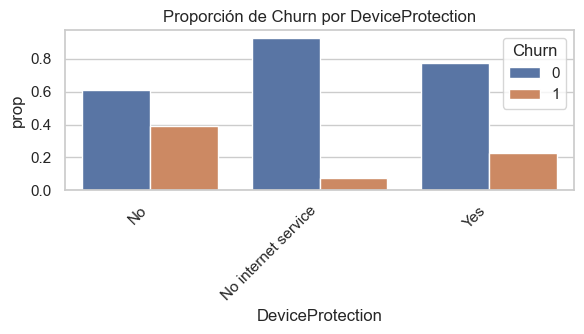

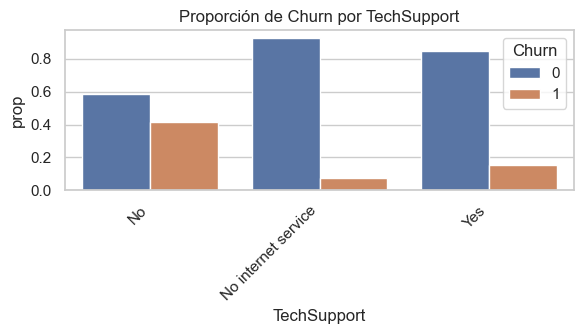

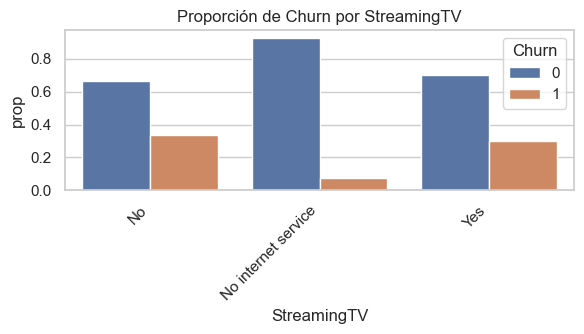

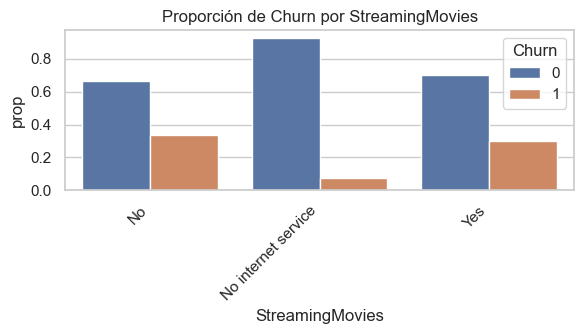

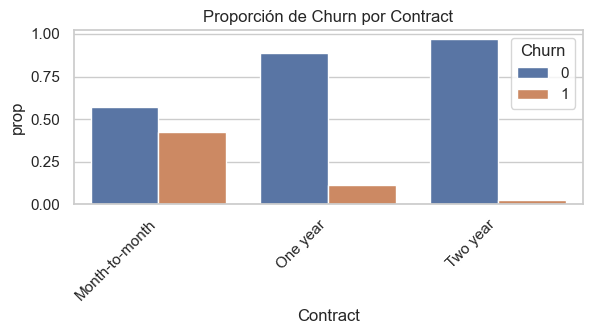

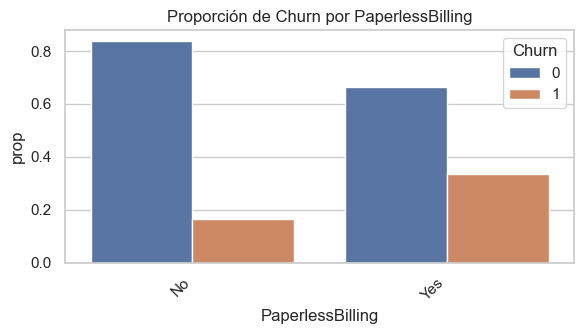

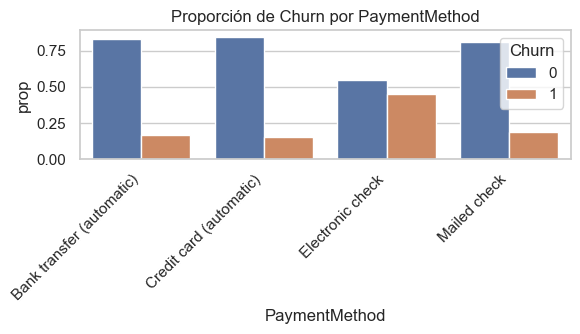

In [32]:
chi_rows = []
for c in cat_cols:
    ct = pd.crosstab(df[c], df[TARGET])
    # Evitar errores cuando alguna categoría tiene 0
    if ct.shape[0] > 1 and ct.shape[1] > 1:
        chi2, p, dof, exp = chi2_contingency(ct)
        chi_rows.append({"variable": c, "chi2": chi2, "p_value": p, "dof": dof})
chi_cat = pd.DataFrame(chi_rows).sort_values("p_value")
display(chi_cat.head(10))

# Barras apiladas por target (proporciones)
for c in cat_cols:
    prop = (df.groupby(c)[TARGET]
              .value_counts(normalize=True)
              .rename("prop").reset_index())
    plt.figure(figsize=(6,3.5))
    sns.barplot(data=prop, x=c, y="prop", hue=TARGET)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Proporción de {TARGET} por {c}")
    plt.tight_layout()
    plt.savefig(FIGS/f"eda_prop_{c}.png", dpi=140)
    plt.show()



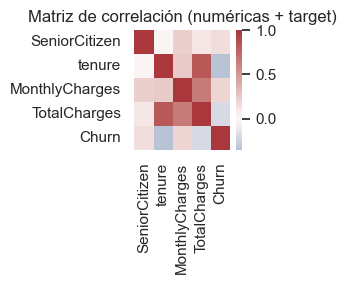

tenure            0.352229
TotalCharges      0.199484
MonthlyCharges    0.193356
SeniorCitizen     0.150889
Name: Churn, dtype: float64

In [33]:
corr = df[num_cols + [TARGET]].corr(numeric_only=True)
plt.figure(figsize=(0.6*len(corr.columns), 0.6*len(corr.columns)))
sns.heatmap(corr, annot=False, cmap="vlag", center=0)
plt.title("Matriz de correlación (numéricas + target)")
plt.tight_layout()
plt.savefig(FIGS/"eda_corr_heatmap.png", dpi=160)
plt.show()

# Top correlaciones absolutas con el target
corr_target = corr[TARGET].drop(TARGET).abs().sort_values(ascending=False)
corr_target.head(10)



In [37]:
# ======= FIX ROBUSTO =======

import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion = pd.crosstab(x, y)
    if confusion.size == 0:
        return np.nan
    chi2 = chi2_contingency(confusion)[0]
    n = confusion.values.sum()
    if n == 0:
        return np.nan
    phi2 = chi2 / n
    r, k = confusion.shape
    # corrección de bias
    phi2corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    rcorr = r - (r-1)**2/(n-1) if n > 1 else r
    kcorr = k - (k-1)**2/(n-1) if n > 1 else k
    denom = min((kcorr-1), (rcorr-1))
    return np.sqrt(phi2corr / denom) if denom > 0 else 0.0

def entropy(s):
    vc = pd.Series(s).value_counts(normalize=True)
    return -(vc * np.log2(vc + 1e-12)).sum()

def conditional_entropy(x, y):
    ey = 0.0
    x = pd.Series(x)
    y = pd.Series(y)
    for _, sub in x.groupby(y):
        ey += (len(sub)/len(x)) * entropy(sub)
    return ey

def theils_u(x, y):
    hx = entropy(x)
    return 1.0 if hx == 0 else (hx - conditional_entropy(x, y)) / hx

def correlation_ratio(categories, measurements):
    """
    η (categorical -> numerical), en [0,1]
    Robusta a NaN y a columnas numéricas con dtype object.
    """
    cats = pd.Series(categories).astype("category")
    meas = pd.to_numeric(pd.Series(measurements), errors="coerce")  # fuerza float
    # grupos como arrays sin NaN
    groups = [meas[cats == lev].dropna().values for lev in cats.cat.categories]
    sizes = [g.size for g in groups]
    n_tot = int(np.sum(sizes))
    if n_tot == 0:
        return np.nan

    # media global (escalar)
    total_sum = float(np.sum([g.sum() for g in groups if g.size > 0]))
    grand_mean = total_sum / n_tot

    # Suma de cuadrados entre grupos (escalar)
    ss_between = float(np.sum([g.size * (float(g.mean()) - grand_mean)**2
                               for g in groups if g.size > 0]))
    # Suma de cuadrados total (escalar)
    ss_total = float(np.sum([np.sum((g - grand_mean)**2) for g in groups if g.size > 0]))

    return np.sqrt(ss_between / (ss_total + 1e-12)) if ss_total > 0 else 0.0

def mixed_corr_matrix(df, num_cols, cat_cols, method_cat="cramers_v", top_cats=None):
    if top_cats:
        cat_cols = list(cat_cols)[:top_cats]

    # asegura que num_cols sean realmente numéricas (convierte bool a int)
    _num_cols = []
    for c in num_cols:
        if pd.api.types.is_bool_dtype(df[c]):
            _num_cols.append(c)
        elif not pd.api.types.is_numeric_dtype(df[c]):
            # intenta convertir silenciosamente
            try:
                df[c] = pd.to_numeric(df[c], errors="coerce")
            except Exception:
                pass
            _num_cols.append(c)
        else:
            _num_cols.append(c)
    num_cols = _num_cols

    cols = list(num_cols) + list(cat_cols)
    M = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols, dtype=float)

    for i, c1 in enumerate(cols):
        for j, c2 in enumerate(cols):
            if i == j:
                M.loc[c1, c2] = 1.0
            elif (c1 in num_cols) and (c2 in num_cols):
                M.loc[c1, c2] = df[[c1, c2]].corr(numeric_only=True).iloc[0, 1]
            elif (c1 in cat_cols) and (c2 in cat_cols):
                M.loc[c1, c2] = cramers_v(df[c1], df[c2]) if method_cat == "cramers_v" else theils_u(df[c1], df[c2])
            else:
                # mixto: cat<->num (η)
                cat, num = (c1, c2) if c1 in cat_cols else (c2, c1)
                M.loc[c1, c2] = correlation_ratio(df[cat], df[num])
    return M



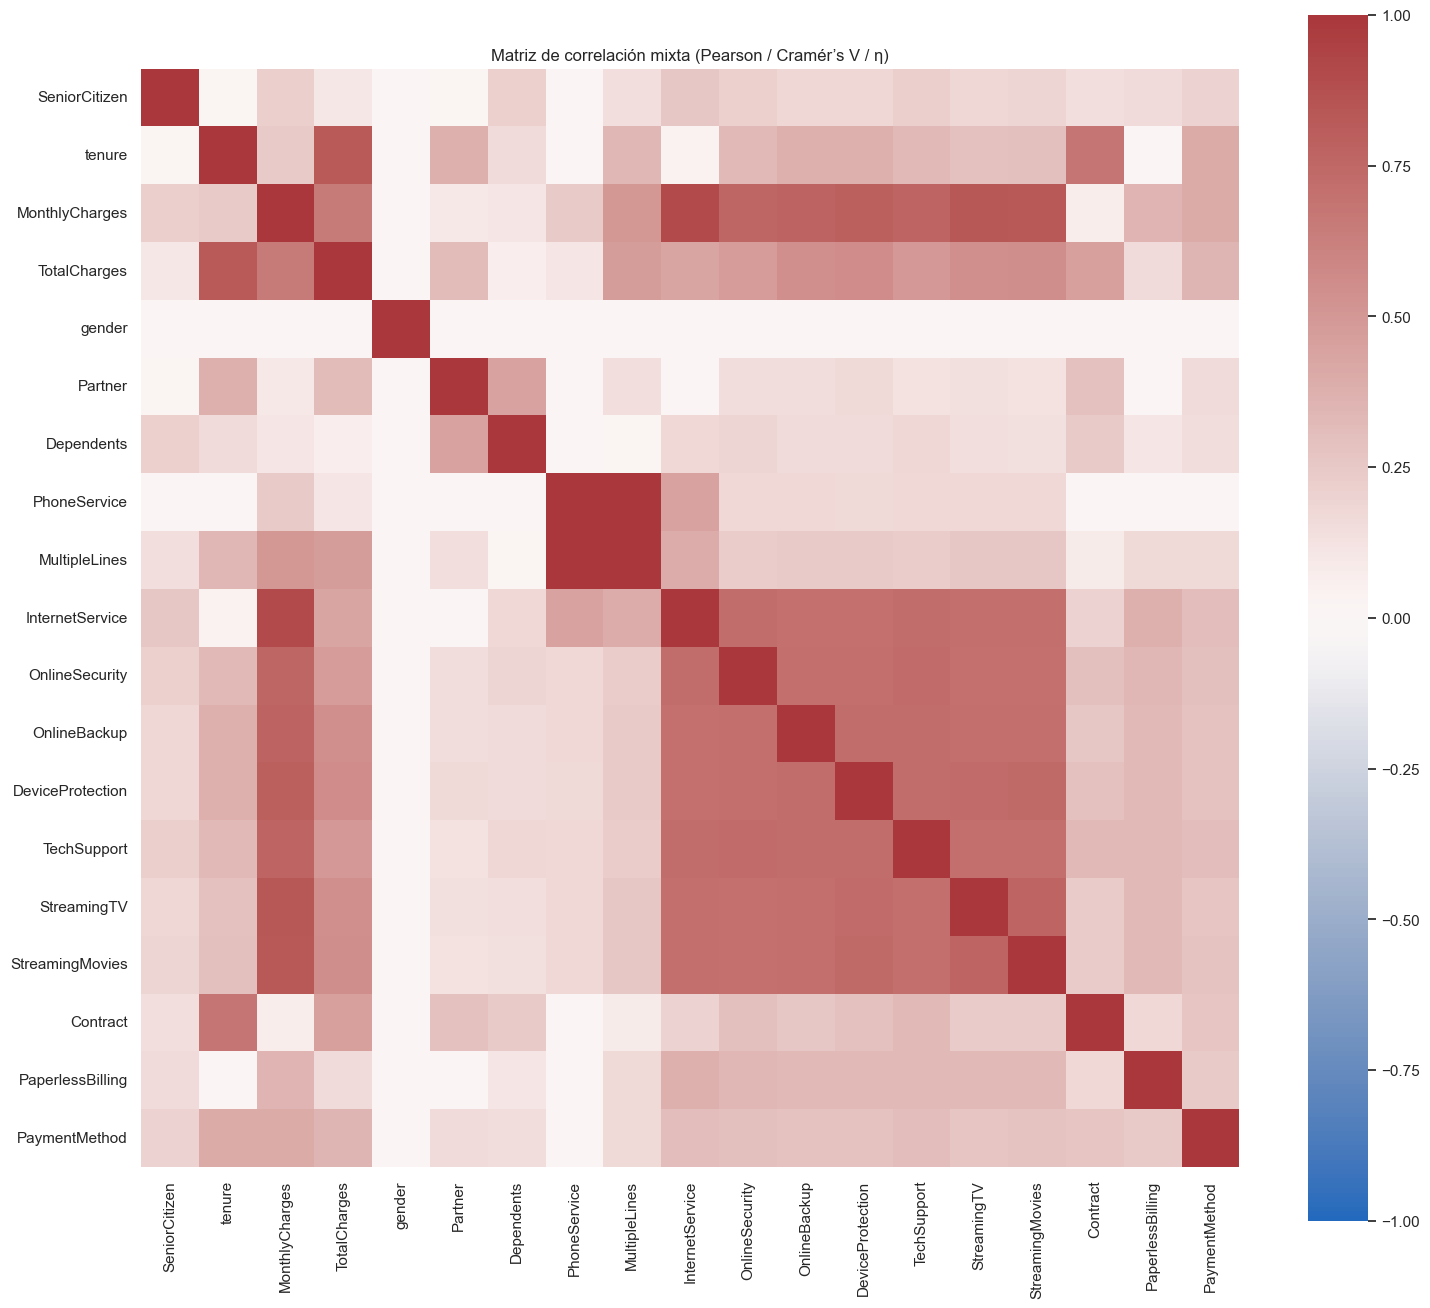

In [38]:
M = mixed_corr_matrix(df, num_cols=num_cols, cat_cols=cat_cols,
                      method_cat="cramers_v", top_cats=15)

plt.figure(figsize=(0.6*len(M.columns)+4, 0.6*len(M.columns)+2))
sns.heatmap(M, cmap="vlag", center=0, vmin=-1, vmax=1, annot=False, square=True)
plt.title("Matriz de correlación mixta (Pearson / Cramér’s V / η)")
plt.tight_layout()
plt.savefig(FIGS/"eda_mixed_correlation.png", dpi=160)
plt.show()


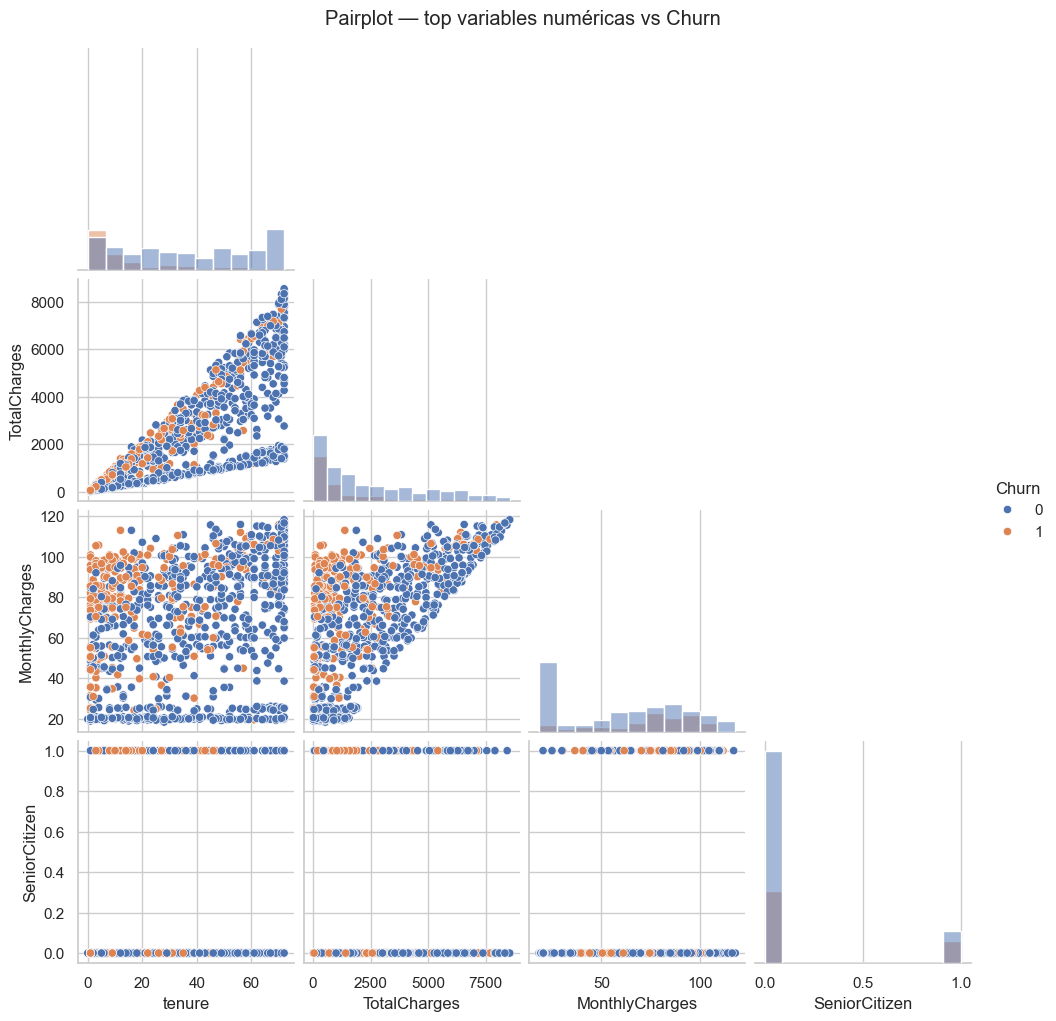

In [39]:
# ========= Pairplot con top-k numéricas =========
from sklearn.preprocessing import StandardScaler

TARGET = "Churn"
# Selecciona top 8 numéricas por |corr| con el target (si es binario, Pearson≈point-biserial)
top_k = 8
corr_target = df[num_cols + [TARGET]].corr(numeric_only=True)[TARGET].drop(TARGET).abs()
top_num = corr_target.sort_values(ascending=False).head(min(top_k, len(corr_target))).index.tolist()

sns.pairplot(df[top_num + [TARGET]].sample(min(1000, len(df))), hue=TARGET, diag_kind="hist", corner=True)
plt.suptitle("Pairplot — top variables numéricas vs Churn", y=1.02)
plt.savefig(FIGS/"eda_pairplot_topnum.png", dpi=140, bbox_inches="tight")
plt.show()


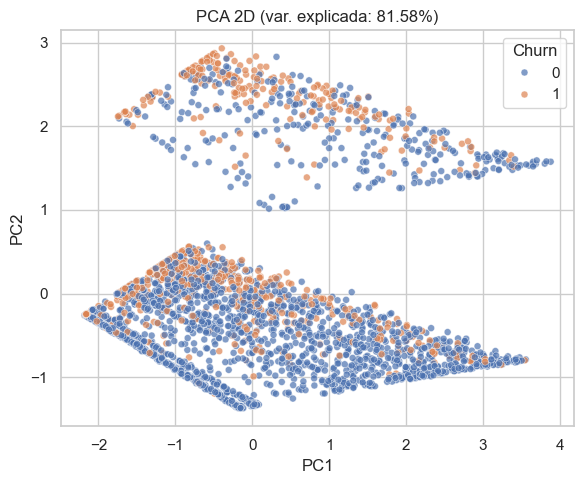

In [40]:
# ========= PCA 2D sobre numéricas =========
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_num = df[num_cols].copy()
X_num = X_num.fillna(X_num.median())

scaler = StandardScaler()
Xz = scaler.fit_transform(X_num)

pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(Xz)

pca_df = pd.DataFrame(Z, columns=["PC1","PC2"])
pca_df[TARGET] = df[TARGET].values

plt.figure(figsize=(6,5))
sns.scatterplot(data=pca_df.sample(min(3000, len(pca_df))), x="PC1", y="PC2", hue=TARGET, alpha=0.7, s=25)
plt.title(f"PCA 2D (var. explicada: {pca.explained_variance_ratio_.sum():.2%})")
plt.tight_layout()
plt.savefig(FIGS/"eda_pca2d_num.png", dpi=150)
plt.show()


In [34]:
# IQR
out_iqr = {}
for c in num_cols:
    q1, q3 = df[c].quantile(0.25), df[c].quantile(0.75)
    iqr = q3 - q1
    li, ls = q1 - 1.5*iqr, q3 + 1.5*iqr
    out_iqr[c] = ((df[c] < li) | (df[c] > ls)).sum()
out_iqr = pd.Series(out_iqr, name="outliers_IQR").sort_values(ascending=False)
display(out_iqr)

# Z-score (>3)
out_z = {}
for c in num_cols:
    z = np.abs(stats.zscore(df[c].astype(float), nan_policy="omit"))
    out_z[c] = (z > 3).sum()
out_z = pd.Series(out_z, name="outliers_Z3").sort_values(ascending=False)
display(out_z)



SeniorCitizen     1142
tenure               0
MonthlyCharges       0
TotalCharges         0
Name: outliers_IQR, dtype: int64

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
Name: outliers_Z3, dtype: int64

In [35]:
resumen = {
    "filas": [len(df)],
    "columnas": [df.shape[1]],
    "faltantes_%_max": [df.isna().mean().max()*100],
    "duplicados_filas": [df.duplicated().sum()],
    "duplicados_id": [df[ID_COL].duplicated().sum()] if ID_COL in df.columns else [np.nan],
    "target_ratio_%_churn": [df[TARGET].mean()*100],
    "num_vars": [len(num_cols)],
    "cat_vars": [len(cat_cols)],
}
pd.DataFrame(resumen)


,filas,columnas,faltantes_%_max,duplicados_filas,duplicados_id,target_ratio_%_churn,num_vars,cat_vars
0,7043,21,0.156183,0,0,26.536987,4,15
